In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [19]:
right = pd.read_csv('60cm-try3-pilot_test/3-right_leg_tibi_20250429_192126_550.csv', skiprows=10, sep=",")
left = pd.read_csv('60cm-try3-pilot_test/2-left_leg_tibia_20250429_192126_549.csv', skiprows=10, sep=",")
pelvis = pd.read_csv('60cm-try3-pilot_test/1-pelvis(s2)_20250429_192126_542.csv', skiprows=10, sep=",")

In [20]:
time = right['SampleTimeFine']-right['SampleTimeFine'].iloc[0]
right['Tim-se']= time*1e-6
right['Tim_dt'] = right['Tim-se'].diff()
right['a_z'] = right['dv[3]'] / right['Tim_dt']

left['Tim-se'] = time * 1e-6
left['Tim_dt'] = left['Tim-se'].diff()
left['a_z'] = left['dv[3]'] / left['Tim_dt']

# For left dataframe

pelvis['Tim-se'] = time* 1e-6
pelvis['Tim_dt'] = pelvis['Tim-se'].diff()
pelvis['a_z'] = pelvis['dv[3]'] / pelvis['Tim_dt']

In [21]:
left['a_z'].describe()

count    478.000000
mean      -1.827974
std        6.193889
min      -44.564229
25%       -1.952976
50%       -1.711826
75%       -1.100198
max       57.200516
Name: a_z, dtype: float64

In [22]:
right['a_z'].describe()

count    478.000000
mean      -1.770408
std        7.781137
min     -116.484010
25%       -1.344723
50%       -1.142287
75%       -0.912822
max       64.667067
Name: a_z, dtype: float64

In [23]:
pelvis['a_z'].describe()

count    476.000000
mean       2.802034
std        4.009494
min       -8.507230
25%        1.610728
50%        1.818354
75%        2.041024
max       39.056879
Name: a_z, dtype: float64

<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='Tim-se'>

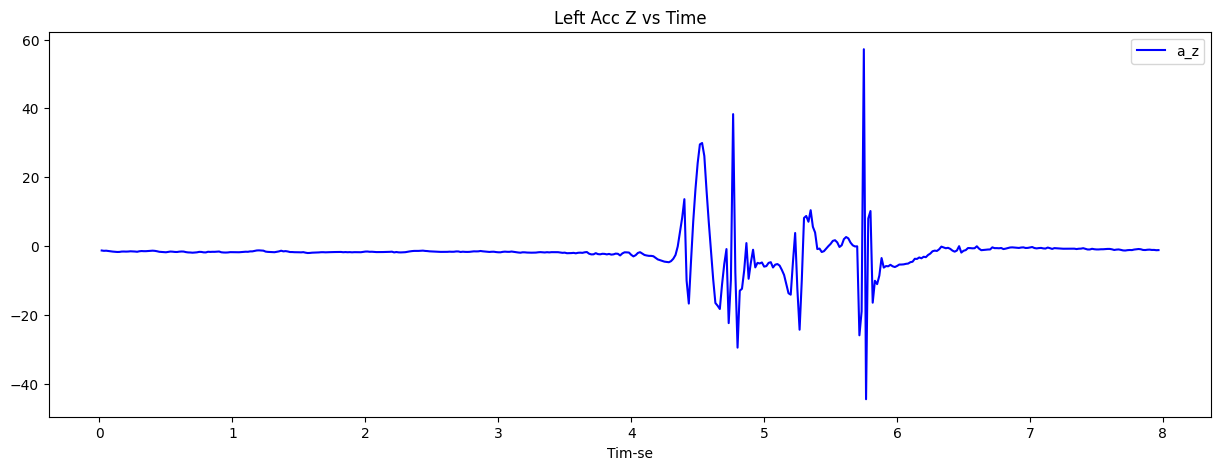

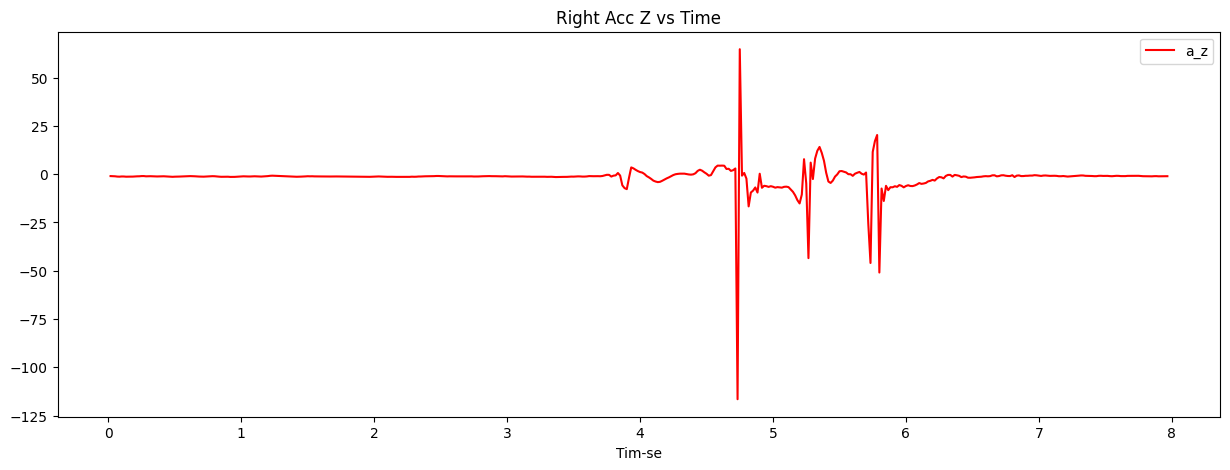

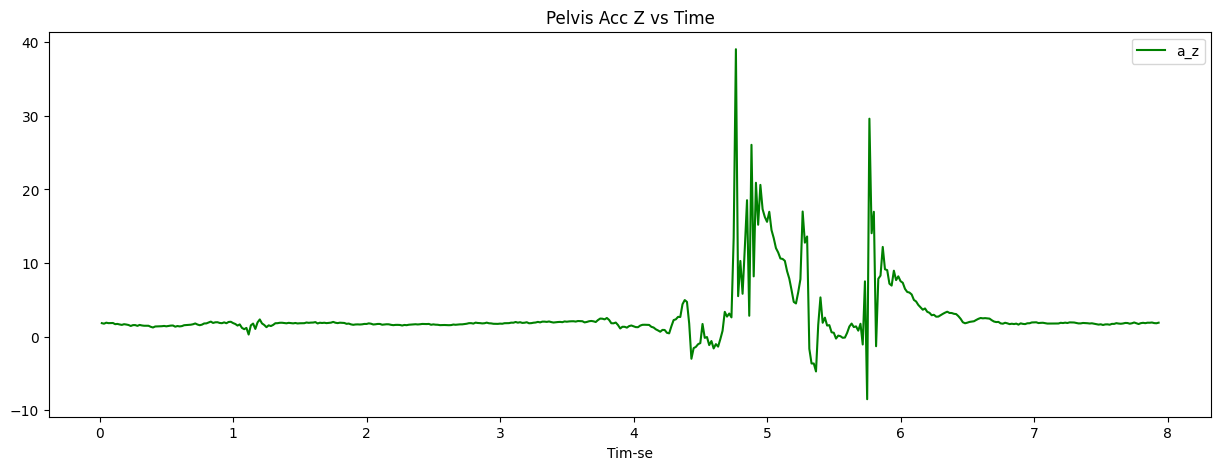

In [24]:
# Visualize the data and find the connection between the accelerometer and ties
left.plot(x='Tim-se', y='a_z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='Tim-se', y='a_z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='Tim-se', y='a_z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')
